In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url,sep=',')

In [4]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.info()
df['hour_beginning'].head(5)

/tmp/ipython-input-168648140.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16057 entries, 0 to 16056
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hour_beginning     16057 non-null  datetime64[ns]
 1   location           16057 non-null  object        
 2   Pedestrians        16057 non-null  int64         
 3   Towards Manhattan  16057 non-null  int64         
 4   Towards Brooklyn   16057 non-null  int64         
 5   weather_summary    16041 non-null  object        
 6   temperature        16041 non-null  float64       
 7   precipitation      16041 non-null  float64       
 8   lat                16057 non-null  float64       
 9   long               16057 non-null  float64       
 10  events             1124 non-null   object        
 11  Location1          16057 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.5+ MB


,hour_beginning
0,2019-04-30 00:00:00
1,2019-12-31 22:00:00
2,2019-12-31 23:00:00
3,2019-12-31 21:00:00
4,2019-04-01 03:00:00


In [5]:
df['hour'] = df['hour_beginning'].dt.hour
df['month'] = df['hour_beginning'].dt.month
df['date'] = df['hour_beginning'].dt.date
df['day_name'] = df['hour_beginning'].dt.day_name()

In [6]:
df.loc[df.temperature.isnull()]

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,4,2019-04-30,Tuesday
482,2019-01-06 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-06,Sunday
701,2019-11-03 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time ends,"(40.7081639691088, -73.9995087014816)",1,11,2019-11-03,Sunday
2140,2019-01-14 00:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-14,Monday
2604,2019-01-09 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-09,Wednesday
2944,2019-03-10 02:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,Daylight Saving Time starts,"(40.7081639691088, -73.9995087014816)",2,3,2019-03-10,Sunday
3951,2019-01-16 00:00:00,Brooklyn Bridge,7,2,5,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,1,2019-01-16,Wednesday
4198,2019-05-02 00:00:00,Brooklyn Bridge,3,2,1,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,5,2019-05-02,Thursday
5206,2019-09-17 00:00:00,Brooklyn Bridge,2,2,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,9,2019-09-17,Tuesday
5277,2019-06-17 01:00:00,Brooklyn Bridge,0,0,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,6,2019-06-17,Monday


In [7]:
df = df.sort_values(by='hour_beginning')

df.reset_index(drop=True, inplace=True)


In [8]:
df['temperature'] = df['temperature'].fillna(method="ffill")
df['precipitation'] = df['precipitation'].fillna(method="ffill")
df['weather_summary'] = df['weather_summary'].fillna(method="ffill")

/tmp/ipython-input-3279570268.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['temperature'] = df['temperature'].fillna(method="ffill")
/tmp/ipython-input-3279570268.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['precipitation'] = df['precipitation'].fillna(method="ffill")
/tmp/ipython-input-3279570268.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


In [11]:
#Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.
df_weekdays = df[df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
df_weekdays.groupby('day_name')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
day_name,,,,,,,,
Friday,2280.0,696.521053,845.244195,0.0,17.0,243.5,1318.00,3722.0
Monday,2304.0,642.983941,777.944829,0.0,12.0,232.0,1232.00,3657.0
Thursday,2280.0,601.263158,728.067954,0.0,16.0,214.0,1102.25,3173.0
Tuesday,2328.0,599.210911,731.047235,0.0,14.0,232.5,1122.50,4141.0
Wednesday,2280.0,574.956140,694.807586,0.0,16.0,217.0,1050.00,3807.0


<Axes: xlabel='day_name', ylabel='Pedestrians'>

Text(0.5, 1.0, 'Pedestrian Counts for Each Day of the Week')

Text(0.5, 0, 'Days of the Week')

Text(0, 0.5, 'Pedestrian Count')

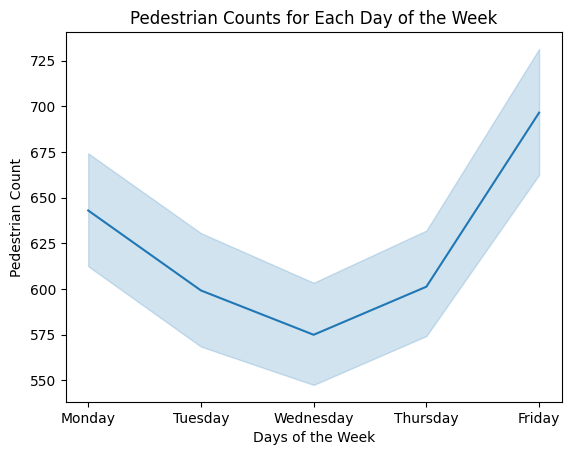

In [16]:
sns.lineplot(x='day_name', y='Pedestrians', data=df_weekdays)
plt.title('Pedestrian Counts for Each Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Pedestrian Count')
plt.show()

In [23]:
#Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year.
df_Brooklyn = df[(df['hour_beginning'].dt.year == 2019) & (df['location'] == 'Brooklyn Bridge')]
df_Brooklyn.groupby('weather_summary')['Pedestrians'].describe()

,count,mean,std,min,25%,50%,75%,max
weather_summary,,,,,,,,
clear-day,1413.0,1382.183298,876.267199,0.0,568.00,1380.0,2028.00,4108.0
clear-night,1865.0,33.150134,78.847485,0.0,0.00,4.0,36.00,1034.0
cloudy,1818.0,541.737624,737.719776,0.0,5.00,120.5,953.00,3894.0
fog,22.0,212.409091,330.504039,0.0,8.75,80.0,222.00,1262.0
partly-cloudy-day,1773.0,1574.093627,866.684380,0.0,870.00,1632.0,2159.00,4286.0
partly-cloudy-night,1213.0,52.596867,119.868003,0.0,1.00,10.0,51.00,1391.0
rain,607.0,229.822076,373.117494,0.0,6.00,52.0,264.50,2703.0
sleet,8.0,178.250000,188.028683,0.0,5.50,155.5,350.25,404.0
snow,38.0,222.631579,344.718328,0.0,5.25,29.5,343.75,1561.0


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Pedestrians and Weather on the Brooklyn Bridge')

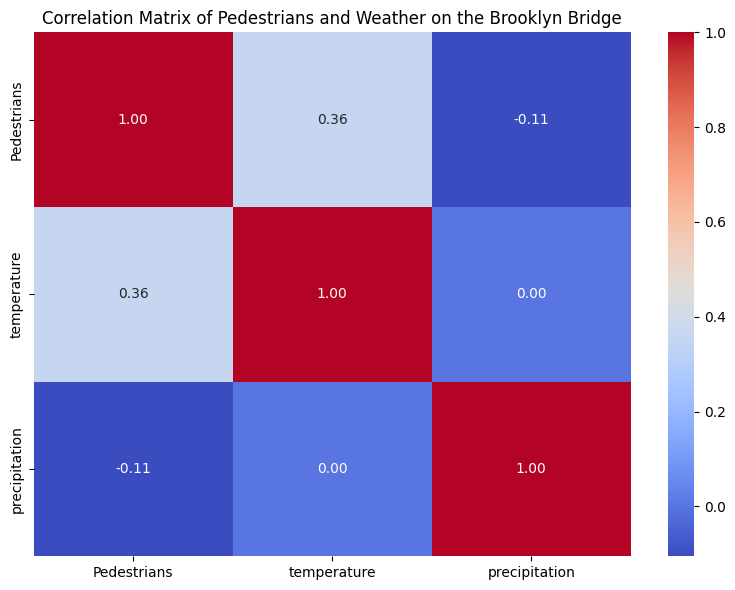

In [32]:
#Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.
correlation_matrix = df_Brooklyn[['Pedestrians', 'temperature', 'precipitation']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pedestrians and Weather on the Brooklyn Bridge')
plt.tight_layout()
plt.show()

In [38]:
#Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['hour'].apply(time_of_day)
df.head(10)

display(df.groupby('time_of_day')['Pedestrians'].describe())

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,hour,month,date,day_name,time_of_day
0,2017-10-01 00:00:00,Brooklyn Bridge,44,30,14,clear-night,52.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",0,10,2017-10-01,Sunday,Night
1,2017-10-01 01:00:00,Brooklyn Bridge,30,17,13,partly-cloudy-night,53.0,0.0002,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",1,10,2017-10-01,Sunday,Night
2,2017-10-01 02:00:00,Brooklyn Bridge,25,13,12,partly-cloudy-night,52.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2,10,2017-10-01,Sunday,Night
3,2017-10-01 03:00:00,Brooklyn Bridge,20,11,9,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",3,10,2017-10-01,Sunday,Night
4,2017-10-01 04:00:00,Brooklyn Bridge,18,10,8,partly-cloudy-night,51.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",4,10,2017-10-01,Sunday,Night
5,2017-10-01 05:00:00,Brooklyn Bridge,16,12,4,partly-cloudy-night,50.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",5,10,2017-10-01,Sunday,Morning
6,2017-10-01 06:00:00,Brooklyn Bridge,113,88,25,partly-cloudy-night,49.0,0.0001,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",6,10,2017-10-01,Sunday,Morning
7,2017-10-01 07:00:00,Brooklyn Bridge,199,72,127,clear-day,49.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",7,10,2017-10-01,Sunday,Morning
8,2017-10-01 08:00:00,Brooklyn Bridge,261,133,128,clear-day,50.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",8,10,2017-10-01,Sunday,Morning
9,2017-10-01 09:00:00,Brooklyn Bridge,845,504,341,clear-day,54.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",9,10,2017-10-01,Sunday,Morning


,count,mean,std,min,25%,50%,75%,max
time_of_day,,,,,,,,
Afternoon,3345.0,1749.484305,787.870792,0.0,1200.00,1756.0,2234.0,4286.0
Evening,2676.0,908.873318,828.406997,0.0,139.75,663.0,1554.5,3639.0
Morning,4683.0,529.699338,610.266529,0.0,84.00,278.0,781.0,4330.0
Night,5353.0,50.086680,127.290324,0.0,1.00,7.0,38.0,1522.0
